# Heart Disease Classification

In [1]:
from utils import *

## Data Preprocessing

In [2]:
filename = 'data/heart_cleveland_upload.csv'
df = pd.read_csv(filename)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [3]:
# Show basic info
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.1

In [4]:
#Checking if dataframe has missing values
if pd.isna(df).values.any()>0:
    print("The Data has missing values")
else:
    print("The Data has no missing values")

The Data has no missing values


### Histograms

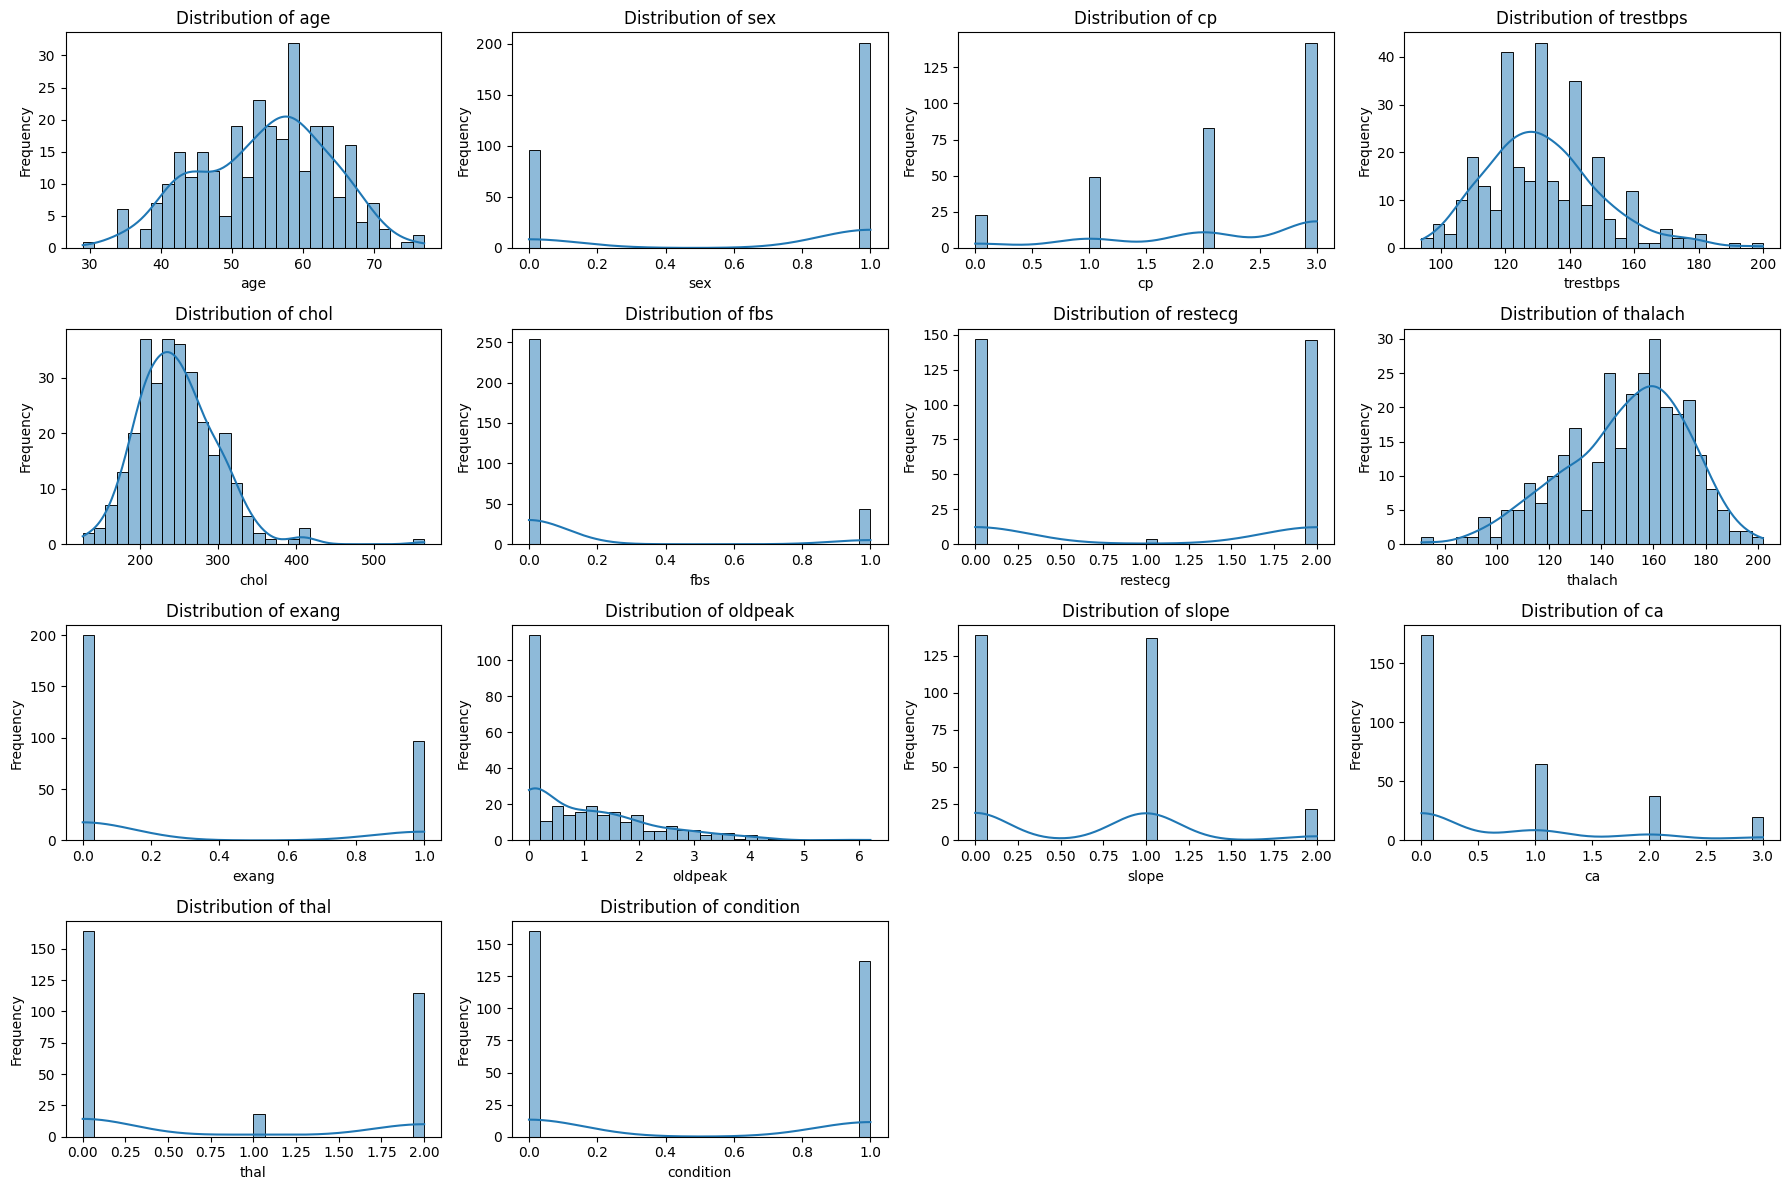

In [5]:
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
# categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

print(df_encoded.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  condition  \
0   69    1       160   234    1      131      0        0   1          0   
1   69    0       140   239    0      151      0        1   2          0   
2   66    0       150   226    0      114      0        2   0          0   
3   65    1       138   282    1      174      0        1   1          1   
4   64    1       110   211    0      144      1        1   0          0   

   cp_1  cp_2  cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  
0     0     0     0          0          1        1        0       0       0  
1     0     0     0          0          0        0        0       0       0  
2     0     0     0          0          0        0        1       0       0  
3     0     0     0          0          1        1        0       0       0  
4     0     0     0          0          1        1        0       0       0  


In [7]:
#Checking if the target is balanced
c0=0
c1=0
for value in df_encoded["condition"]:
    if value==1:
        c1+=1
    else:
        c0+=1
print(f"{c1} patients have a condition, {c0} don't")
print(f"Ratio of patients: {c1/(c1+c0)}")

137 patients have a condition, 160 don't
Ratio of patients: 0.4612794612794613


In [8]:
#As it looks since there is no high disparity between healthy people and pacients
#Next in line is Normalization
scaler = StandardScaler()

#will drop the condition label
target = df_encoded["condition"]
print(target.head())
df_encoded = df_encoded.drop("condition", axis=1)
# col_n = ["age", "trestbps", "chol", "thalach", "oldpeak"]
col_n = ["age", "trestbps", "chol", "thalach", "oldpeak", 'ca']
df_stand = df_encoded[col_n]

df_stand = scaler.fit_transform(df_stand)
df_encoded[col_n] = df_stand
print(df_encoded)

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64
          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
0    1.600302    1  1.596266 -0.257179    1 -0.812095      0 -0.723395   
1    1.600302    0  0.468418 -0.160859    0  0.061157      0  0.206684   
2    1.268242    0  1.032342 -0.411292    0 -1.554358      0  1.136764   
3    1.157555    1  0.355633  0.667499    1  1.065396      0  0.206684   
4    1.046868    1 -1.223355 -0.700254    0 -0.244481      1  0.206684   
..        ...  ...       ...       ...  ...       ...    ...       ...   
292 -1.609620    1  1.145127 -0.469085    0  1.371034      0 -0.723395   
293 -1.720306    1 -0.772215 -0.546141    0 -0.419131      0  0.206684   
294 -2.163054    1 -0.659431 -0.950688    0 -0.855757      1  0.206684   
295 -2.163054    0  0.355633 -1.239649    0  1.414697      0  0.206684   
296 -2.163054    1 -0.321076  0.667499    0  0.279470      1 -0.723395   

           ca  cp_1  cp_2  cp_3  restecg_1  re

### Split data into Train and Test Set

In [9]:
X = df_encoded
y = target

#Shuffling in order to avoid bias data
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

print(X.head())
print()
print(y.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
0  1.600302    1  1.596266 -0.257179    1 -0.812095      0 -0.723395   
1  1.600302    0  0.468418 -0.160859    0  0.061157      0  0.206684   
2  1.268242    0  1.032342 -0.411292    0 -1.554358      0  1.136764   
3  1.157555    1  0.355633  0.667499    1  1.065396      0  0.206684   
4  1.046868    1 -1.223355 -0.700254    0 -0.244481      1  0.206684   

         ca  cp_1  cp_2  cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  \
0  0.344824     0     0     0          0          1        1        0       0   
1  1.411625     0     0     0          0          0        0        0       0   
2 -0.721976     0     0     0          0          0        0        1       0   
3  0.344824     0     0     0          0          1        1        0       0   
4 -0.721976     0     0     0          0          1        1        0       0   

   thal_2  
0       0  
1       0  
2       0  
3       0  
4       0  

0    0


In [10]:
# Split data into train and test set: 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Shuffled
X_train_shuffle, X_test_shuffle, y_train_shuffle, y_test_shuffle = train_test_split(X_shuffle, y_shuffle, test_size=0.2, random_state=42)

In [11]:
print(f"Training Set:       X_train={X_train.shape},    y_train={y_train.shape}")
print(f"Test Set:           X_test={X_test.shape},      y_test={y_test.shape}")

Training Set:       X_train=(237, 18),    y_train=(237,)
Test Set:           X_test=(60, 18),      y_test=(60,)


## All models

In [12]:
model_names = ('Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'XGBoost', 'Neural Network')
best_models = []

filenames = ('log_reg.png', 'svm.png', 'rf.png', 'knn.png', 'xgboost.png', 'nn.png')

## 5-fold cross validation

In [13]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Logistic Regression

### Grid search to find the best parameter C

In [14]:
# log_reg = LogisticRegression(solver='liblinear', max_iter=300)

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     cv=cv,
#     scoring='accuracy',
#     verbose=1
# )

# grid_search.fit(X_train_shuffle, y_train_shuffle)

# best_log_reg = grid_search.best_estimator_
# best_models.append(best_log_reg)
# print("Best C from GridSearchCV:", grid_search.best_params_['C'])

### Best parameter is C=1

In [15]:
best_log_reg = LogisticRegression(C=1, max_iter=300)
best_log_reg.fit(X_train_shuffle, y_train_shuffle)
best_models.append(best_log_reg)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

In [16]:
# print_classification_report_from_model(best_log_reg, X_train, y_train)
print_classification_report_from_model(best_log_reg, X_train_shuffle, y_train_shuffle)

Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       125
           1       0.90      0.84      0.87       112

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.87      0.80      0.83        25

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60




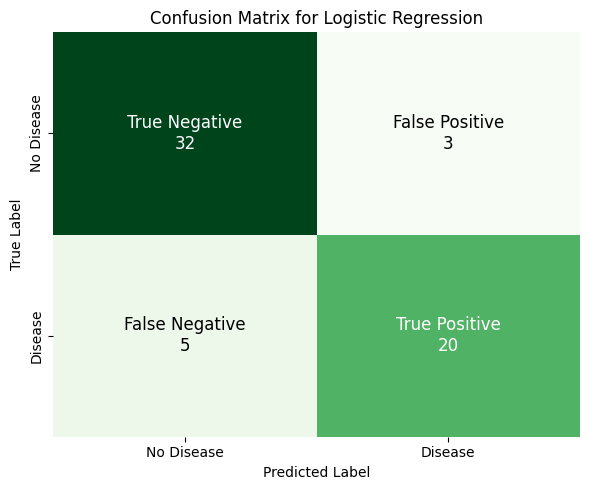

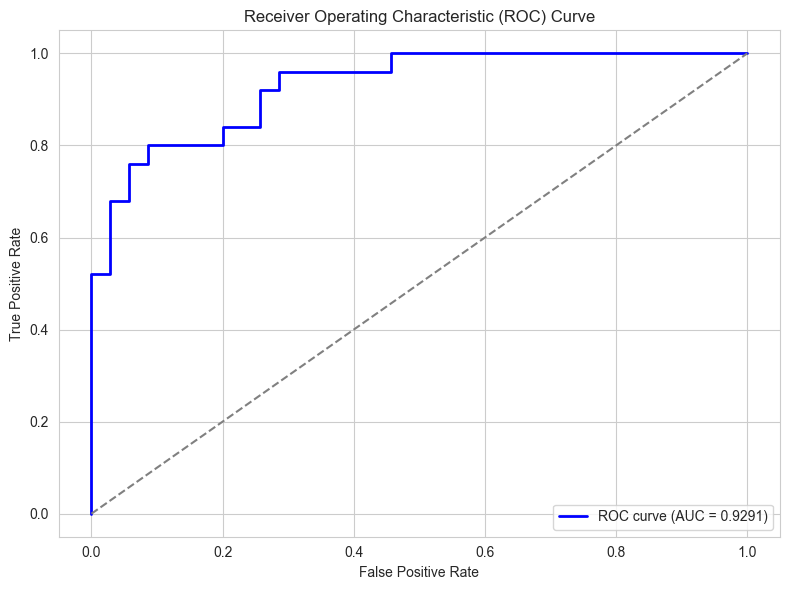

In [17]:
# print_metrics(best_log_reg, X_test, y_test)
print_metrics(best_log_reg, X_test_shuffle, y_test_shuffle, model_names[0], filenames[0])

## Support Vector Machine

### Grid search to find the best parameters

In [18]:
# svc = SVC(probability=True)

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']      # for rbf
# }

# grid_search = GridSearchCV(
#     estimator=svc,
#     param_grid=param_grid,
#     cv=cv,
#     scoring='accuracy',
#     verbose=1
# )

# grid_search.fit(X_train_shuffle, y_train_shuffle)

# best_svm = grid_search.best_estimator_
# best_models.append(best_svm)
# print("Best Parameters:", grid_search.best_params_)

### Best parameters are: C=1, gamma='auto', kernel='rbf'

In [19]:
best_svm = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
best_svm.fit(X_train_shuffle, y_train_shuffle)
best_models.append(best_svm)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

In [20]:
# print_classification_report_from_model(best_svm, X_train, y_train)
print_classification_report_from_model(best_svm, X_train_shuffle, y_train_shuffle)

Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       125
           1       0.91      0.86      0.88       112

    accuracy                           0.89       237
   macro avg       0.89      0.89      0.89       237
weighted avg       0.89      0.89      0.89       237



Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.87      0.80      0.83        25

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60




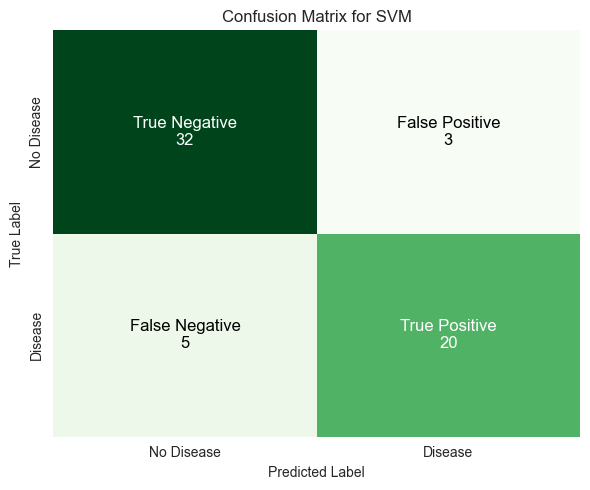

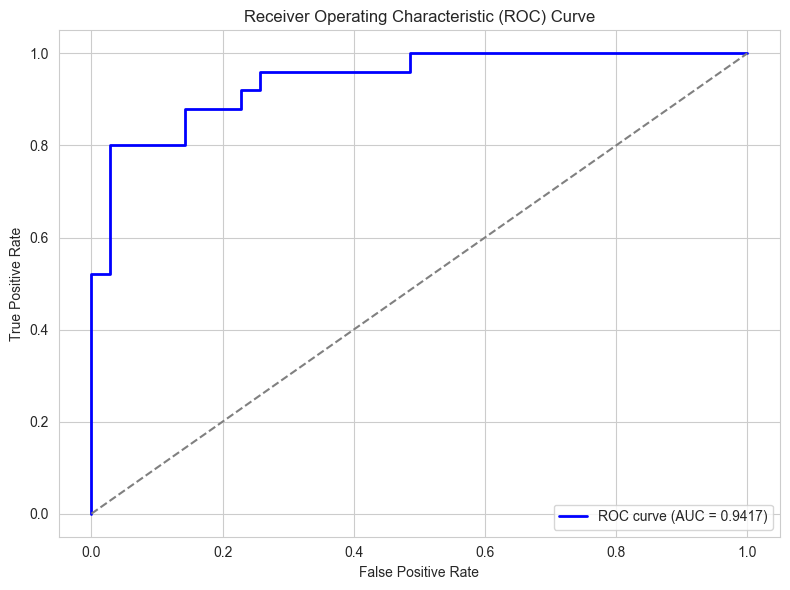

In [21]:
# print_metrics(best_svm, X_test, y_test)
print_metrics(best_svm, X_test_shuffle, y_test_shuffle, model_names[1], filenames[1])

## Random Forest

### Grid search to find the best parameters

In [22]:
# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "max_depth": [3, 5, 7, None],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["sqrt", "log2", None], 
#     "bootstrap": [True, False]
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=cv,
#     scoring="accuracy",
#     verbose=1
# )
# # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_shuffle, y_train_shuffle)

# best_rf = grid_search.best_estimator_
# best_models.append(best_rf)
# print("Best Parameters:", grid_search.best_params_)

### Best parameters are: bootstrap=True, max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200

In [23]:
best_rf = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)
best_rf.fit(X_train_shuffle, y_train_shuffle)
best_models.append(best_rf)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

In [24]:
# print_classification_report_from_model(best_rf, X_train, y_train)
print_classification_report_from_model(best_rf, X_train_shuffle, y_train_shuffle)

Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.93      0.89      0.91       112

    accuracy                           0.92       237
   macro avg       0.92      0.91      0.92       237
weighted avg       0.92      0.92      0.92       237



Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.83      0.80      0.82        25

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60




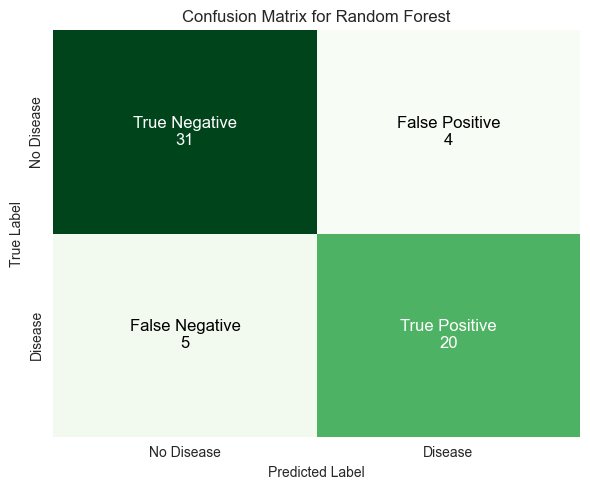

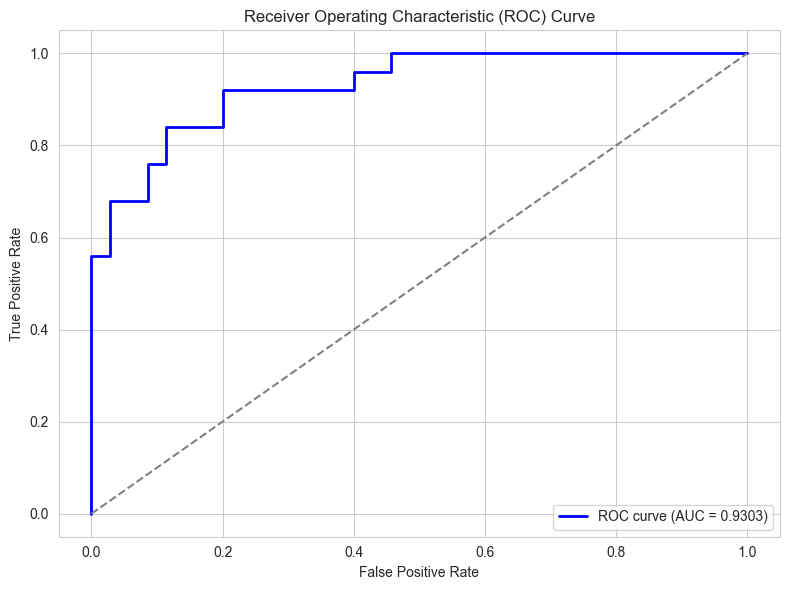

In [25]:
# print_metrics(best_rf, X_test, y_test)
print_metrics(best_rf, X_test_shuffle, y_test_shuffle, model_names[2], filenames[2])

## KNN

### Grid search to find the best parameters

In [26]:
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [5, 7, 9, 15, 30],
#     'weights': ['uniform', 'distance'],
#     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     "p": [1, 2],
#     'metric': ['euclidean', 'manhattan']
# }

# grid_search = GridSearchCV(
#     estimator=knn,
#     param_grid=param_grid,
#     cv=cv,
#     scoring='accuracy',
#     verbose=1
# )

# # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_shuffle, y_train_shuffle)

# best_knn = grid_search.best_estimator_
# best_models.append(best_knn)
# print("Best Parameters:", grid_search.best_params_)

### Best parameters are: n_neighbors=5, weights='uniform', metric='manhattan', p=1

In [27]:
best_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan', p=1)
best_knn.fit(X_train_shuffle, y_train_shuffle)
best_models.append(best_knn)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

In [28]:
# print_classification_report_from_model(best_knn, X_train, y_train)
print_classification_report_from_model(best_knn, X_train_shuffle, y_train_shuffle)

Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       125
           1       0.86      0.81      0.83       112

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



Accuracy: 0.8833333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.82      0.92      0.87        25

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60




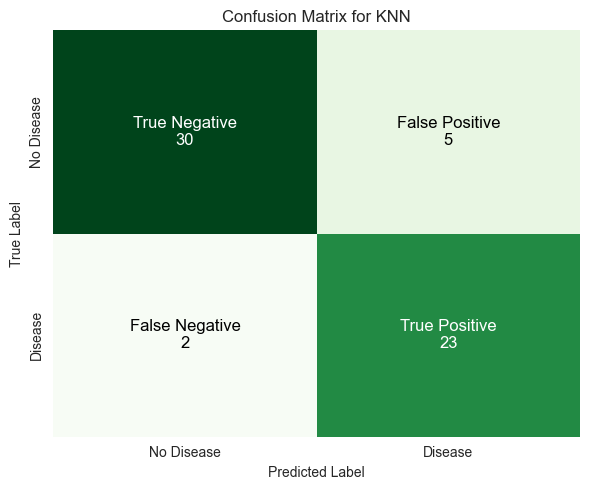

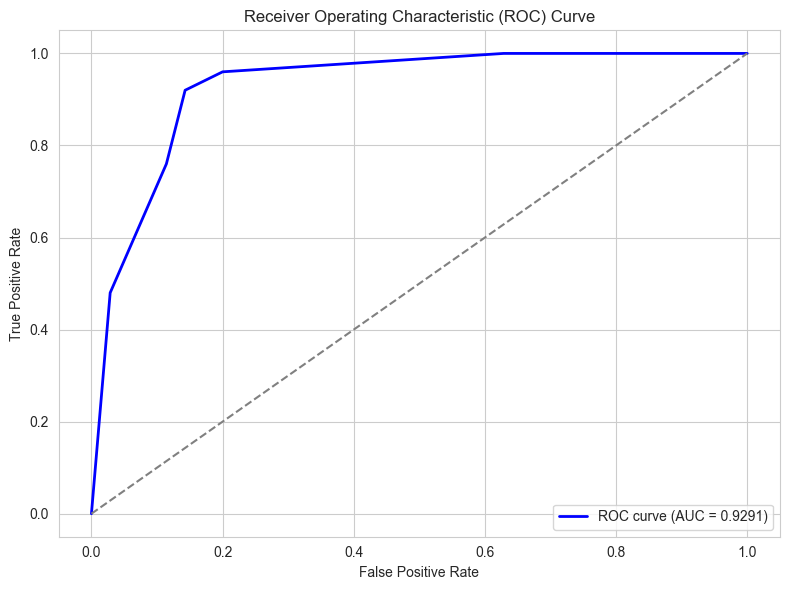

In [29]:
# print_metrics(best_knn, X_test_shuffle, y_test_shuffle)
print_metrics(best_knn, X_test_shuffle, y_test_shuffle, model_names[3], filenames[3])

## XGBoost

### Grid search to find the best parameters

In [30]:
# xboost = xgb.XGBClassifier()

# # param_grid = {
# #     "learning_rate":[0.01, 0.1, 0.2],
# #     "max_depth":[3, 5, 7],
# #     "n_estimators":[50, 100, 200],
# #     "subsample":[0.7, 0.8, 1.0],
# #     "colsample_bytree":[0.7, 0.8, 1.0],
# #     # Regularization parameters
# #     "reg_alpha": [0, 0.1, 0.5],       # L1 regularization
# #     "reg_lambda": [1, 5, 10],         # L2 regularization
# #     "gamma": [0, 0.1, 0.5]            # Minimum loss reduction for split
# # }

# param_grid = {
#     "learning_rate": [0.01, 0.05],  
#     "max_depth": [3, 4],            
#     "n_estimators": [100, 200],
#     "subsample": [0.6, 0.8],        
#     "colsample_bytree": [0.6, 0.8],
#     "reg_alpha": [0.1, 0.5],        
#     "reg_lambda": [5, 10],          
#     "gamma": [0.1, 0.5]             
# }

# grid_search = GridSearchCV(
#      estimator=xboost,
#      param_grid=param_grid,
#      cv=cv,
#      scoring="accuracy",
#      verbose=1
# )

# # # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_shuffle, y_train_shuffle)

# best_xgb = grid_search.best_estimator_
# best_models.append(best_xgb)
# print("Best Parameters:", grid_search.best_params_)

### Best Parameters: colsample_bytree: 0.6, gamma: 0.5, learning_rate: 0.05, max_depth': 4, n_estimators: 100, reg_alpha: 0.1, reg_lambda: 5, subsample: 0.6

In [31]:
best_xgb = xgb.XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.6, colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=5, gamma=0.5)
best_xgb.fit(X_train_shuffle, y_train_shuffle)
best_models.append(best_xgb)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

In [32]:
# print_classification_report_from_model(best_xgb, X_train, y_train)
print_classification_report_from_model(best_xgb, X_train_shuffle, y_train_shuffle)

Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       125
           1       0.91      0.85      0.88       112

    accuracy                           0.89       237
   macro avg       0.89      0.89      0.89       237
weighted avg       0.89      0.89      0.89       237



Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.83      0.80      0.82        25

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60




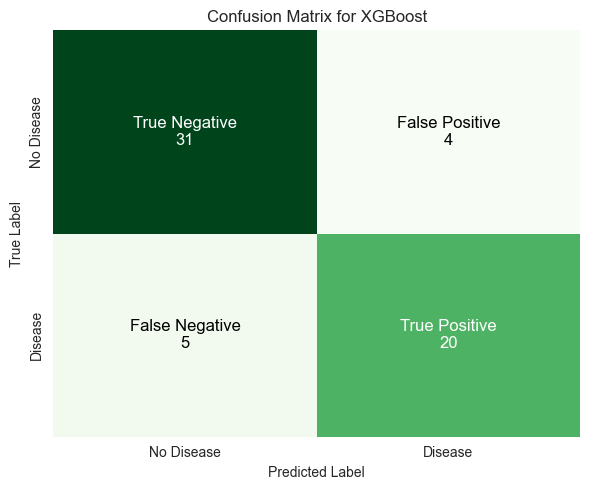

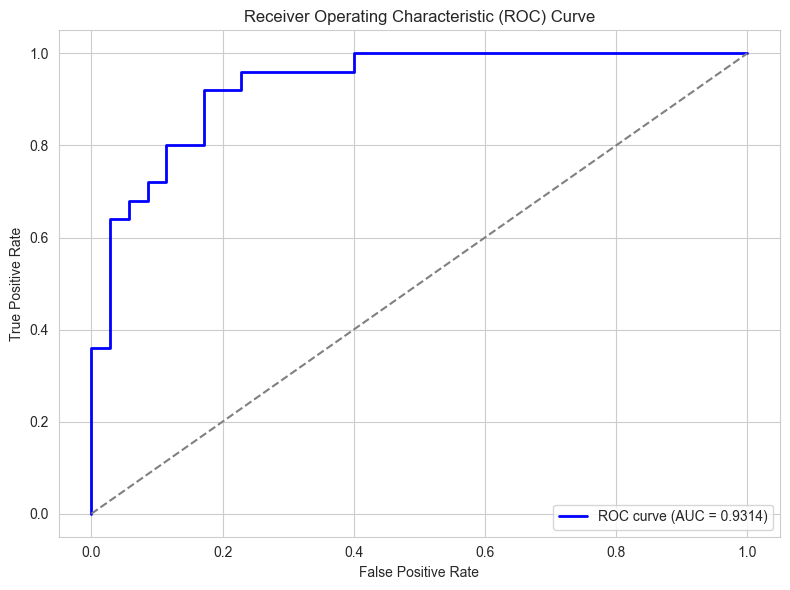

In [33]:
# print_metrics(best_xgb, X_test, y_test)
print_metrics(best_xgb, X_test_shuffle, y_test_shuffle, model_names[4], filenames[4])

## Neural Network

### Model architecture

In [34]:
def build_model(num_layers=3, neurons=[8, 4, 4], l2_lambda=0.01, dropout_rate=0.3):
    """
    Builds a flexible neural network model.

    Parameters:
    - num_layers: int (1 to 3) - number of hidden layers.
    - neurons: list - number of neurons for each hidden layer (length should be at least num_layers).
    - lr: float - learning rate.
    - l2_lambda: float - L2 regularization factor.
    - dropout_rate: float - dropout rate.

    Returns:
    - Compiled Keras model.
    """
    if len(neurons) < num_layers:
        raise ValueError("Please provide at least as many neuron counts as the number of layers.")

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for i in range(num_layers):
        model.add(Dense(neurons[i], activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    return model

### Grid search to find the best architecture

In [35]:
# architecture_space = {
#     1: [
#         [8],
#         [16],
#         [32],
#         [64],
#         [128],
#         [256]
#     ],
#     2: [
#         [8, 4],
#         [16, 8],
#         [32, 16],
#         [64, 32],
#         [128, 64],
#         [32, 8],
#         [64, 16],
#         [16, 16],
#         [32, 32],
#         [64, 64]
#     ],
#     3: [
#         [32, 16, 8],
#         [64, 32, 16],
#         [128, 64, 32],
#         [64, 64, 64],
#         [32, 32, 32],
#         [16, 16, 16],
#         [64, 16, 4],
#         [32, 8, 4]
#     ]
# }

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# X_train = np.array(X_train_shuffle)
# y_train = np.array(y_train_shuffle)

# results = {}
# best_mean_acc = 0
# best_params = None

# for num_layers, neuron_combinations in tqdm(architecture_space.items()):
#     for neurons in neuron_combinations:
#         fold_accuracies = []

#         for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):       
#             # Split data
#             X_tr, X_val = X_train[train_index], X_train[val_index]
#             y_tr, y_val = y_train[train_index], y_train[val_index]

#             # Build and train model
#             model = build_model(num_layers=num_layers, neurons=neurons)
#             model.fit(X_tr, y_tr, epochs=50, batch_size=32, verbose=0)

#             # Evaluate
#             y_pred = (model.predict(X_val, verbose=0) > 0.5).astype("int32")
#             acc = accuracy_score(y_val, y_pred)
#             fold_accuracies.append(acc)

#         mean_acc = np.mean(fold_accuracies)
#         std_acc = np.std(fold_accuracies)
#         results[(num_layers, tuple(neurons))] = fold_accuracies
        
#         if mean_acc > best_mean_acc:
#             best_mean_acc = mean_acc
#             best_params = {
#                 'num_layers': num_layers,
#                 'neurons': neurons,
#                 'mean_accuracy': mean_acc,
#                 'std_accuracy': std_acc
#             }

# print("Best Architecture Found:")
# print(f"  Hidden Layers: {best_params['num_layers']}")
# print(f"  Neurons: {best_params['neurons']}")
# print(f"  Mean Accuracy: {best_params['mean_accuracy']:.4f}")
# print(f"  Std Accuracy: {best_params['std_accuracy']:.4f}")

### Best architecture: number of layers = 2, neurons = [64, 32]

```
Best Architecture Found:
  Hidden Layers: 2
  Neurons: [64, 32]
  Mean Accuracy: 0.8485
  Std Accuracy: 0.0545
```

In [36]:
best_num_layers = 2
best_neurons = [64, 32]

### Grid search for best hyperparameters

In [37]:
# batch_sizes = [16, 32, 64]
# epochs_list = [50, 100, 150]
# l2_lambda_values = [0.001, 0.01, 0.1]
# dropout_rates = [0.3, 0.5]

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# X_train = np.array(X_train_shuffle)
# y_train = np.array(y_train_shuffle)

# best_accuracy = 0
# best_params = {}

# for batch_size, epochs, l2_lambda, dropout_rate in tqdm(list(product(batch_sizes, epochs_list, l2_lambda_values, dropout_rates))):
#     fold_accuracies = []

#     for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):       
#         # Split data
#         X_tr, X_val = X_train[train_index], X_train[val_index]
#         y_tr, y_val = y_train[train_index], y_train[val_index]

#         # Build and train model
#         model = build_model(num_layers=best_num_layers, neurons=best_neurons, l2_lambda=l2_lambda, dropout_rate=dropout_rate)
#         model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, verbose=0)

#         # Evaluate
#         y_pred = (model.predict(X_val, verbose=0) > 0.5).astype("int32")
#         acc = accuracy_score(y_val, y_pred)
#         fold_accuracies.append(acc)
        
#         mean_accuracy = np.mean(fold_accuracies)
    
#         if mean_accuracy > best_accuracy:
#             best_accuracy = mean_accuracy
#             best_params = {'batch_size': batch_size, 'epochs': epochs, 'l2_lambda': l2_lambda, 'dropout_rate': dropout_rate}

# print("Best Parameters:", best_params)

### Best Parameters: {'batch_size': 64, 'epochs': 50, 'l2_lambda': 0.1, 'dropout_rate': 0.5}

In [38]:
best_nn = build_model(num_layers=best_num_layers, neurons=best_neurons, l2_lambda=0.1, dropout_rate=0.5)
best_nn.fit(X_train_shuffle, y_train_shuffle, batch_size=64, epochs=50, verbose=0)
best_models.append(best_nn)

### Metrics (Classification Report, Confusion Matrix and ROC Curve)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report (Train data):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.83      0.76      0.79       112

    accuracy                           0.81       237
   macro avg       0.82      0.81      0.81       237
weighted avg       0.82      0.81      0.81       237

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.91      0.84      0.88        25

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60




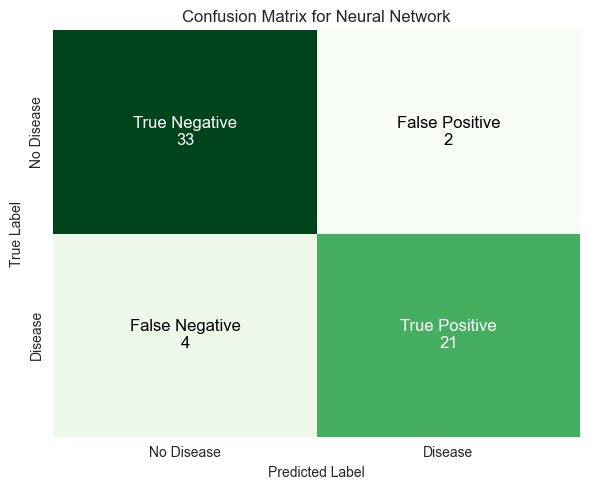

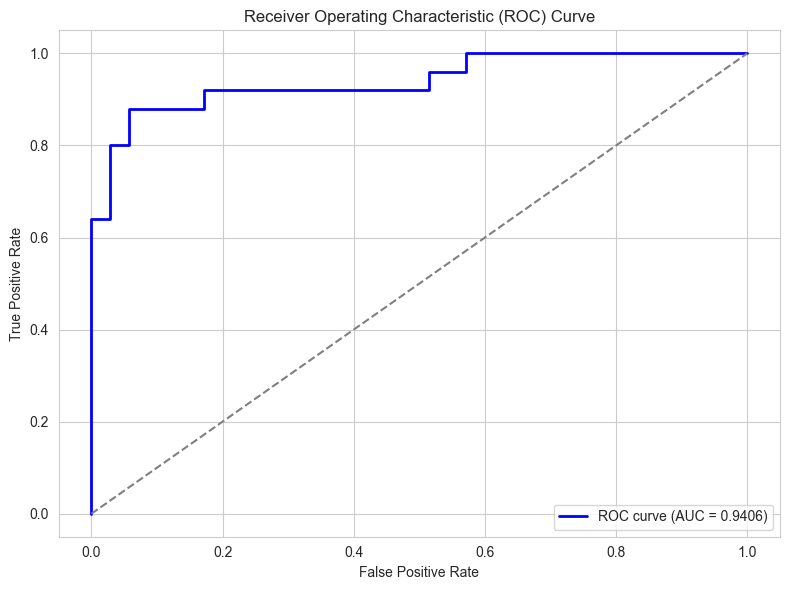

In [39]:
print_classification_report_from_model(best_nn, X_train_shuffle, y_train_shuffle)

# print_metrics(best_nn, X_test, y_test)
print_metrics(best_nn, X_test_shuffle, y_test_shuffle, model_names[5], filenames[5])

In [40]:
best_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

## Comparison of all models

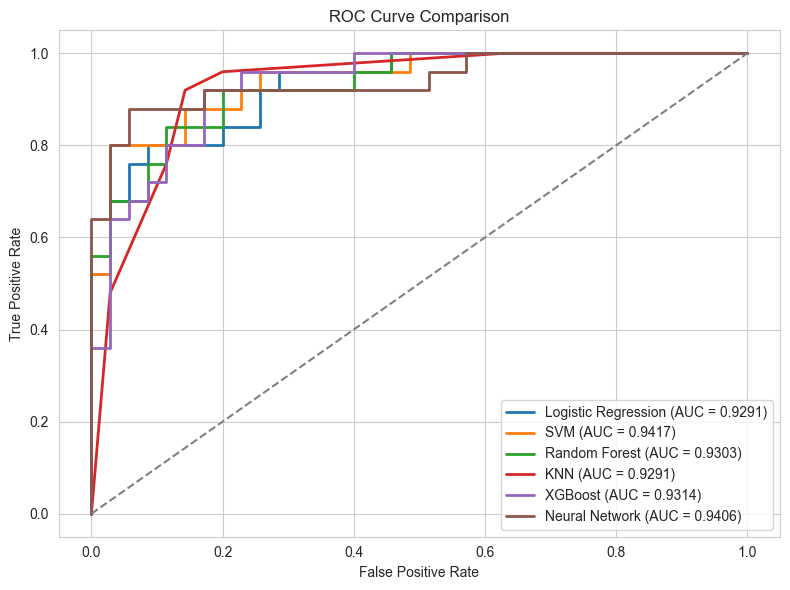

In [41]:
plot_roc_curves(best_models, model_names, X_test_shuffle, y_test_shuffle)